In [86]:
import pandas as pd

from util.sql_switch import get_query_native

count_query = "select count(ds.title), ds.title, ds.created_at \
from delab_moderationrating mr \
    join delab_moderationcandidate2 d on mr.mod_candidate_id = d.id \
    join delab_tweet dt on dt.id = d.tweet_id \
    join delab_simplerequest ds on dt.simple_request_id = ds.id \
where mr.u_moderating_part is not null \
  and mr.u_moderating_part <> '' \
group by \
    ds.title, ds.created_at \
order by count(ds.title) desc"

df_term_counts = get_query_native(count_query)
# print(df_term_counts.head(8))


# squashing similar titles
import functools as ft

list_of_similar_terms = [["Thema"], ["calm", "down"], ["constructive", "criticism"], ["explain"],
                         ["topic"], ["whataboutism"], ["valid", "point"], ["Perspektive"], ["agree"],
                         ["summary"]]

# list_of_similar_terms = []

def title_group_mapper(text):
    group_title = text
    for term_group in list_of_similar_terms:
        for term in term_group:
            if term in text and group_title == text:
                group_title = ft.reduce(lambda x, y: x + "_" + y, term_group)
    return group_title


grouped_titles = df_term_counts["title"].map(title_group_mapper)
df_term_counts["grouped_titles"] = grouped_titles
df_term_counts.drop(["title", "created_at"], axis=1, inplace=True)
df_term_counts = df_term_counts.groupby("grouped_titles").sum()
df_term_counts.sort_values(by=["count"], axis=0, inplace=True, ascending=False)
df_term_counts.head(10)

using postgres


/home/dehne/PycharmProjects/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
grouped_titles,
bitte sachlich bleiben,130
Thema,84
topic,54
"""hear your view""",50
explain,45
"""can you elaborate""",42
valid_point,41
"""näher erläutern""",39
constructive_criticism,34


# Summary of biggest inter-coder conflicts

- load moderation rating from database or use previous
- show a list of top 10 conflicting ratings

In [87]:
import numpy as np

intercoder_query = "select dt.text, ds.created_at, ds.title, mr.u_moderating_part, mr.u_mod_rating as rating1, mr2.u_mod_rating as rating2, mr.mod_coder_id as coder_id_1, mr2.mod_coder_id as coder_id_2 \
from delab_moderationrating mr \
    join delab_moderationcandidate2 d on mr.mod_candidate_id = d.id \
    join delab_moderationrating mr2 on mr2.mod_candidate_id = d.id \
    join delab_tweet dt on dt.id = d.tweet_id \
    join delab_simplerequest ds on dt.simple_request_id = ds.id \
where mr.u_moderating_part is not null \
  and mr.u_moderating_part <> '' \
  and ds.created_at > '2022-09-01 00:00:00' \
  and mr.mod_coder_id <> mr2.mod_coder_id \
  and mr.u_mod_rating <> mr2.u_mod_rating;"

df_ic = get_query_native(intercoder_query)
df_ic.drop_duplicates("text", inplace=True)
grouped_titles = df_ic["title"].map(title_group_mapper)
df_ic["grouped_titles"] = grouped_titles
df_ic.drop("title", axis=1, inplace=True)


# print(df_ic.head(3))

def calculate_coding_distance(df):
    bigger = df.max(axis=1)
    smaller = df.min(axis=1)
    result = (bigger - smaller).abs()
    return result


df_ic["intercoder_distance"] = calculate_coding_distance(df_ic[["rating1", "rating2"]])
df_ic.sort_values(by="intercoder_distance", inplace=True, ascending=False)

df_ic.head(10)

using postgres


/home/dehne/PycharmProjects/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,text,created_at,u_moderating_part,rating1,rating2,coder_id_1,coder_id_2,grouped_titles,intercoder_distance
204,"@KabeloMogashoa8 He has signed, what do you mean if he doesn’t sign?",2022-11-17 09:54:28.305338+00:00,"He has signed, what do you mean if he doesn’t sign?",2,-2,11,1,"what ""you mean""",4
209,"@jon_d_doe I have a four year old son, and no achievement on planet earth would be complete success if I fail to be a decent father to him let alone be great one.\n\nSo I asked you that question to hear your view as I disagree with your choice of making it a gender thing with use of woman.",2022-11-17 10:50:52.533139+00:00,So I asked you that question to hear your view as I disagree with your choice of making it a gender thing with use of woman.,2,-2,11,1,"""hear your view""",4
194,"@dhothersall Dunc, Tory Govt in London or a govt elected by all the people living in Scotland. Which is more likely to create a better society? Keen to hear your view, ta.",2022-11-17 10:50:52.533139+00:00,"Keen to hear your view, ta.",2,-2,11,1,"""hear your view""",4
195,"@ItBegins2012 @erikslater_ @TheSteinLine @KyrieIrving @joetsai1999 He did not apologize, was extremely adamant, emphatic about that, and he was dismissed. Siiimple. He wanted to come back. After he said no to an apology. Coming back is different. Can you understand that distinction?To come back he needs to do more. Makes sense.",2022-11-17 10:10:10.968562+00:00,Can you understand that distinction?,2,-2,11,1,"""can you understand""",4
197,"@Cryptic_Maestro Would love to hear your view on #CB, the project looks solid and have been catching many eyes lately, low mc, low tax of 7% and their Dapp is releasing soon\n\n#CB $CB #BTC #ETH @thecloutbase https://t.co/v7dkKOiyRD",2022-11-17 10:50:52.533139+00:00,"Would love to hear your view on #CB, the project looks solid and have been catching many eyes lately, low mc, low tax of 7% and their Dapp is releasing soon #CB $CB #BTC #ETH",2,-2,11,1,"""hear your view""",4
198,"@warmburial It’s vague. I read every word. It is a proposal without firm boundaries. Now you might live your life on the fly. Go for it. But as far as law is concerned, specific language is needed or exploitation will occur. Can you understand that?",2022-11-17 10:10:10.968562+00:00,Can you understand that?,2,-2,11,1,"""can you understand""",4
199,@Guyler_ Appreciate the feedback - if desired you can turn off the search entry via Taskbar Settings. Pressing the Windows key and typing will still start a search if needed,2022-11-17 10:33:50.514645+00:00,Appreciate the feedback -,2,-2,11,1,appreciate feedback,4
200,"@GuyDavies16 @Jes_Squirrell Please can I ask, what do you think we need to do differently? I'm always open to feedback and ideas (though can't please everyone all the time!)",2022-11-17 10:24:53.594081+00:00,"Please can I ask, what do you think we need to do differently? I'm always open to feedback and ideas (though can't please everyone all the time!)",2,-2,11,1,"""open to feedback""",4
201,"@brad_alan_music @MarcusDAurelius Sounds like you wanna play too. Explain it then. I'll wait. I stated that below, let's hear your view of this toward God.\n\nOK i'll play. What is IT, that gibberish you said 'believing loyalty' in regard to going full Christian to avoid catching diseases!\n\nI'll wait.",2022-11-17 10:50:52.533139+00:00,"Explain it then. I'll wait. I stated that below, let's hear your view of this toward God.",2,-2,11,1,"""hear your view""",4
202,some 1129 pfps I made free to use if u wanna 🥰 im open to feedback/suggestions but don’t be mean 🥺🥺🥺 \n\nhttps://t.co/FwWCb02oQF https://t.co/Bkm8uax0JO,2022-11-17 10:24:53.594081+00:00,im open to feedback/suggestions but don’t be mean 🥺🥺🥺,2,-2,11,1,"""open to feedback""",4


# Summary of inter-coder-reliability over time and per phrases
- load the dataset from the db
- set 2 to 1, and -2 to -1 for simplicity
- compute Krippendorf-Alpha for the ratings
- plot Krippendorf-Alpha over time globally
- plot Krippendorf-Alpha over time per title

In [88]:
import simpledorff

inter_coder_reliability_query = "select ds.created_at, ds.title, mr.u_mod_rating, mr.mod_coder_id \
from delab_moderationrating mr \
    join delab_moderationcandidate2 d on mr.mod_candidate_id = d.id \
    join delab_tweet dt on dt.id = d.tweet_id \
    join delab_simplerequest ds on dt.simple_request_id = ds.id \
where mr.u_moderating_part is not null \
  and mr.u_moderating_part <> '' \
  and mr.u_mod_rating <> 0"

df_rel = get_query_native(inter_coder_reliability_query)
grouped_titles = df_rel["title"].map(title_group_mapper)
df_rel["grouped_titles"] = grouped_titles
df_rel.drop("title", axis=1, inplace=True)

value_mapping = {2: 1, -2: -1}
coder_mapping = {1: 1}
for i in range(2, 100):
    coder_mapping[i] = 2
df_rel.replace({"mod_coder_id": value_mapping}, inplace=True)
df_rel.replace({"mr.mod_coder_id": coder_mapping}, inplace=True)
# create new time_stamp_column that takes a time_stamp every 10 units per topic
df_rel["created_at"] = df_rel["created_at"].map(lambda x: pd.to_datetime(x))
df_rel.sort_values(by="created_at", inplace=True)
df_rel.set_index("created_at", inplace=True)


def compute_incremental_krippendorf_column(df):
    df = df.copy(deep=True)
    date2krippendorf = {}

    # debugging code
    if "valid_point" in list(df.grouped_titles):
        print("testing incremental krippendorf")
    if "Sichtweise" in list(df.grouped_titles):
        print("testing krippendorf 0")

    week_labels_list = []
    for week_index, weekly_labels in df.groupby(pd.Grouper(freq="3D")):
        try:
            week_labels_list.append(weekly_labels)
            week_labels_aggro = pd.concat(week_labels_list)
            s_dorf = simpledorff.calculate_krippendorffs_alpha_for_df(week_labels_aggro, experiment_col='created_at',
                                                                      annotator_col='mod_coder_id',
                                                                      class_col='u_mod_rating')
        except ZeroDivisionError:
            s_dorf = np.NaN

        for date in weekly_labels.index:
            date2krippendorf[date] = s_dorf

    pd.options.mode.chained_assignment = None
    df["krippendorf"] = df.index.map(date2krippendorf)
    return df


# compute the krippendorf for each title_group
krippendorfed_frames = []

for title in set(df_rel.grouped_titles):
    single_title_dataset = df_rel[df_rel["grouped_titles"] == title]
    df_rel_single_with_krippendorf = compute_incremental_krippendorf_column(single_title_dataset)
    krippendorfed_frames.append(df_rel_single_with_krippendorf)

df_rel_with_krippendorf = pd.concat(krippendorfed_frames)
# printing out the codings from the last day and their incremental krippendorf (aggregated over all weeks)
df_rel_with_krippendorf.last("1D")


using postgres


/home/dehne/PycharmProjects/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


testing incremental krippendorf
testing krippendorf 0


,u_mod_rating,mod_coder_id,grouped_titles,krippendorf
created_at,,,,
2022-11-24 16:20:08.563560+00:00,2,1,bitte sachlich bleiben,0.0
2022-11-24 16:20:08.563560+00:00,2,1,bitte sachlich bleiben,0.0
2022-11-24 16:20:08.563560+00:00,2,1,bitte sachlich bleiben,0.0
2022-11-24 16:20:08.563560+00:00,2,1,bitte sachlich bleiben,0.0
2022-11-24 16:20:08.563560+00:00,2,1,bitte sachlich bleiben,0.0
...,...,...,...,...
2022-11-17 10:50:52.533139+00:00,2,11,"""hear your view""",0.0
2022-11-17 10:50:52.533139+00:00,2,11,"""hear your view""",0.0
2022-11-17 10:50:52.533139+00:00,2,11,"""hear your view""",0.0


### Summary of best working Terms:
- sorted by the highest krippendorf at the current time aggregating all data
- grouped by the phrases

In [89]:
df_rel_highest_icr = df_rel_with_krippendorf.groupby("grouped_titles").last()
df_rel_highest_icr = df_rel_highest_icr.drop(["u_mod_rating", "mod_coder_id"], axis=1)
df_rel_highest_icr = df_rel_highest_icr[df_rel_highest_icr["krippendorf"] != 0]
df_rel_highest_icr.sort_values(by="krippendorf", inplace=True, ascending=False)


# computed the krippendorf column
# listing the highest icr by grouped_title
df_rel_highest_icr.head(10)

,krippendorf
grouped_titles,
topic,0.312500
Thema,0.166667
valid_point,-0.025641
explain,-0.037037
constructive_criticism,-0.076923
agree,-0.500000
"""Meinung hören""",NaN
"""arguments presented""",NaN
"""can you respond""",NaN


In [90]:
#calculate overall average of krippendorf

inter_coder_reliability_query = "select ds.created_at, ds.title, mr.u_mod_rating, mr.mod_coder_id \
from delab_moderationrating mr \
    join delab_moderationcandidate2 d on mr.mod_candidate_id = d.id \
    join delab_tweet dt on dt.id = d.tweet_id \
    join delab_simplerequest ds on dt.simple_request_id = ds.id \
where mr.u_moderating_part is not null \
  and mr.u_moderating_part <> ''"

df_rel_2 = get_query_native(inter_coder_reliability_query)

s_dorf = simpledorff.calculate_krippendorffs_alpha_for_df(df_rel_2, experiment_col='created_at',
                                                          annotator_col='mod_coder_id',
                                                          class_col='u_mod_rating')
s_dorf

using postgres


/home/dehne/PycharmProjects/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


-0.08762179223274336

# Computing Time Sliced Development of Krippendorf

- write procedure to slice the dataframe in time spans of a week
- calculate the krippendorf per title group and week (if possible)
- plot the changes in krippendorf over time

<AxesSubplot:xlabel='created_at'>

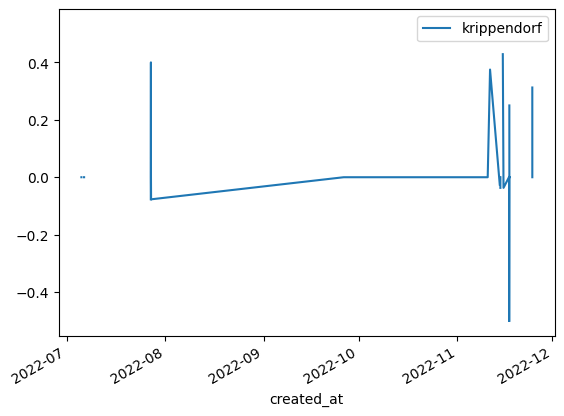

In [91]:
# krippendorf alpha for all terms
df_rel_with_krippendorf.plot.line(y="krippendorf")




Alle 0 für constructive_criticism!>


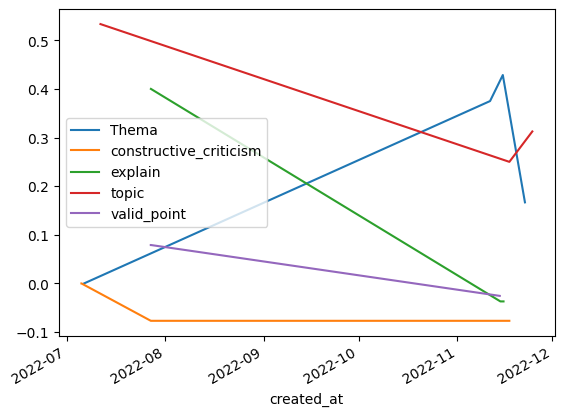

In [92]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

top_5_titles = df_rel_highest_icr.head(5)
df_rel_top_5 = df_rel_with_krippendorf[df_rel_with_krippendorf["grouped_titles"].isin(top_5_titles.index.to_list())]
#df_rel_top_5.reset_index(inplace=True)

fig, ax = plt.subplots()

for key, grp in df_rel_top_5.groupby(['grouped_titles']):
    if grp.empty:
        print('DataFrame is empty for title {}!'.format(key))
    if grp[grp["krippendorf"] > 0].empty:
        print('Alle 0 für {}!>'.format(key))
    ax = grp.plot(ax=ax, kind='line', y='krippendorf', label=key)
#ax.set_xlim([datetime.date(2022, 9, 15), datetime.date(2023, 1, 1)])
plt.legend(loc='best')
plt.show()
